# Ejercicios de recopilación y alamacenamiento de datos (SQL)

## Introducción primera parte.
Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Estudiarás una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
URL='https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "weather_records"})
heading_table=[]
for row in table.find_all('th'):
    heading_table.append(row.text)   
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


## Introducción segunda parte

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Estudiarás una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Descripción de los datos

Una base de datos con información sobre viajes en taxi en Chicago:

### tabla neighborhoods: datos sobre los barrios de la ciudad

name: nombre del barrio

neighborhood_id: código del barrio

### tabla cabs: datos sobre los taxis

cab_id: código del vehículo

vehicle_id: ID técnico del vehículo

company_name: la empresa propietaria del vehículo

### tabla trips: datos sobre los viajes

trip_id: código del viaje

cab_id: código del vehículo que opera el viaje

start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)

end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)

duration_seconds: duración del viaje en segundos

distance_miles: distancia del viaje en millas

pickup_location_id: código del barrio de 

dropoff_location_id: código del barrio de finalización

### tabla weather_records: datos sobre el clima

record_id: código del registro meteorológico

ts: fecha y hora del registro (tiempo redondeado a la hora)

temperature: temperatura cuando se tomó el registro

description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

## Esquema de la tabla

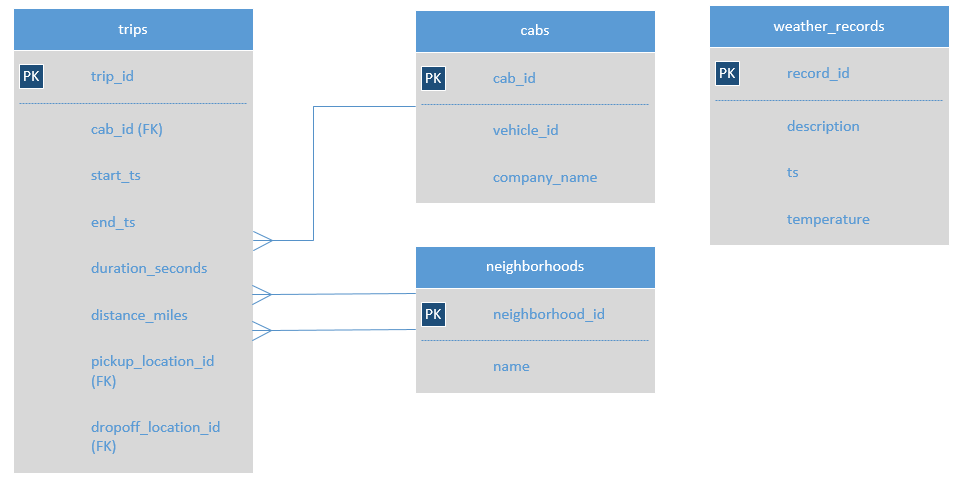

## Descripción general de los ejercicios.

### Ejercicios de 1 a 3: Análisis exploratorio de datos

### Ejercicios de 4 a 6: Prueba la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

### Eejercicio 1.

Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.

In [ ]:
# Query to get number of trips per company between 2017-11-15 and 2017-11-16

query = """
SELECT 
    cabs.company_name AS company_name, 
    COUNT(trips.trip_id) AS trips_amount
FROM 
    trips
JOIN 
    cabs ON trips.cab_id = cabs.cab_id
WHERE 
    DATE(trips.start_ts) BETWEEN '2017-11-15' AND '2017-11-16'
GROUP BY 
    cabs.company_name
ORDER BY 
    trips_amount DESC;
"""

# df = pd.read_sql_query(query, connection)
# display(df)

### Eejercicio 2. 

Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

In [ ]:
# Query to get the number of trips for companies containing 'Yellow' or 'Blue'
# between 2017-11-01 and 2017-11-07

query = """
SELECT 
    cabs.company_name, 
    COUNT(trips.trip_id) AS trips_amount
FROM 
    trips
INNER JOIN 
    cabs ON trips.cab_id = cabs.cab_id
WHERE 
    DATE(trips.start_ts) BETWEEN '2017-11-01' AND '2017-11-07'
    AND (
        cabs.company_name LIKE '%Yellow%'
        OR cabs.company_name LIKE '%Blue%'
    )
GROUP BY 
    cabs.company_name
ORDER BY 
    trips_amount DESC;
"""

# df = pd.read_sql_query(query, connection)
# display(df)

### Ejercicio 3. 

Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

In [ ]:
# Query to compare number of trips from 'Flash Cab' and 'Taxi Affiliation Services'
# against all other companies between 2017-11-01 and 2017-11-07

query = """
-- Selection for 'Flash Cab' and 'Taxi Affiliation Services'
SELECT 
    cabs.company_name AS company, 
    COUNT(trips.trip_id) AS trips_amount
FROM 
    trips
INNER JOIN 
    cabs ON trips.cab_id = cabs.cab_id
WHERE 
    DATE(trips.start_ts) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name IN ('Flash Cab', 'Taxi Affiliation Services')
GROUP BY 
    cabs.company_name

UNION ALL

-- Selection for all other companies grouped as 'Other'
SELECT 
    'Other' AS company, 
    COUNT(trips.trip_id) AS trips_amount
FROM 
    trips
INNER JOIN 
    cabs ON trips.cab_id = cabs.cab_id
WHERE 
    DATE(trips.start_ts) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name NOT IN ('Flash Cab', 'Taxi Affiliation Services')
GROUP BY 
    company

ORDER BY 
    trips_amount DESC;
"""

# df = pd.read_sql_query(query, connection)
# display(df)

### Ejercicio 4.

Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

In [ ]:
query = """
SELECT
    neighborhood_id,
    name
FROM 
    neighborhoods
WHERE 
    name LIKE '%Hare' OR name = 'Loop';
"""
# df = pd.read_sql_query(query, connection)
# display(df)

### Ejercicio 5.

Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

In [ ]:
# Query to classify weather conditions as 'Good' or 'Bad' based on keywords in the description

query = """
SELECT 
    ts, 
    CASE 
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM 
    weather_records;
"""

# df = pd.read_sql_query(query, connection)
# display(df)

### Ejercicio 6. 

Recupera de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

Las columnas de la tabla deben estar en el siguiente orden:

start_ts
weather_conditions
duration_seconds
Ordena por trip_id.

In [ ]:
# Query to get trip duration and weather conditions for trips from location 50 to 63 on Saturdays

query = """
SELECT 
    trips.start_ts, 
    CASE 
        WHEN weather_records.description LIKE '%rain%' OR weather_records.description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions,
    trips.duration_seconds
FROM 
    trips
INNER JOIN 
    weather_records 
    ON trips.start_ts = weather_records.ts
WHERE 
    trips.pickup_location_id = 50
    AND trips.dropoff_location_id = 63
    AND EXTRACT(DOW FROM trips.start_ts) = 6
ORDER BY 
    trips.trip_id;
"""

# df = pd.read_sql_query(query, connection)
# display(df)